In [1]:
# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

In [2]:
# Define the polynomial model of degree 3, i.e., having 3 weights and 1 bias. 
# Also define the loss function

def model(inp, w_a, w_b, w_c, b):
    return w_a * inp ** 3 + w_b * inp ** 2 + w_c * inp + b

def loss_fn(prediction, out):
    return ((prediction - out)**2).mean()

epoch 1000 loss 7.206725
epoch 2000 loss 1.559047
epoch 3000 loss 0.637284
epoch 4000 loss 0.485404
epoch 5000 loss 0.460195
epoch 6000 loss 0.455988
epoch 7000 loss 0.455281
epoch 8000 loss 0.455163
epoch 9000 loss 0.455142
epoch 10000 loss 0.455140


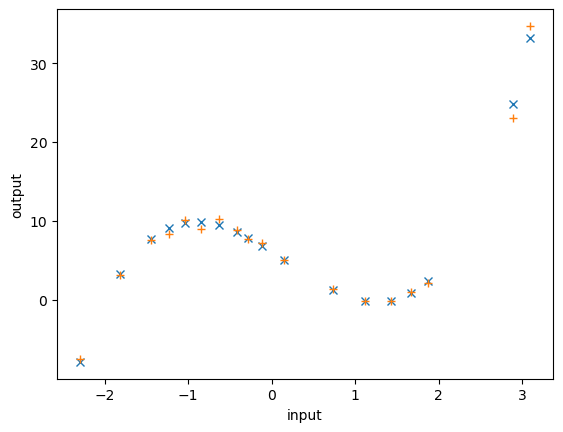

In [3]:
# Define gradient manually wrt the exisiting parameters
# Note: You need to define appropriate derivative functions to define the gradient
# Use the defined gradient function to define the training function 
# Note: You cannot use autograd and optimizers
# Run it on the input and output vector with appropriate learning rate and number of iterations
# Plot the learned curve

import torch
from matplotlib import pyplot as plt

# derivative of loss wrt the model
def d_loss_wrt_model(prediction, out):
    return 2.0 * (prediction - out) / prediction.size(0)

# derivative of loss wrt the weight a
def d_model_wrt_w_a(inp, w_a, w_b, w_c, b):
    return inp ** 3

# derivative of loss wrt the weight b
def d_model_wrt_w_b(inp, w_a, w_b, w_c, b):
    return inp ** 2

# derivative of loss wrt the weight c
def d_model_wrt_w_c(inp, w_a, w_b, w_c, b):
    return inp
    
# derivative of loss wrt the bias
def d_model_wrt_b(inp, w_a, w_b, w_c, b):
    return 1.0

# gradient function
def gradient_fn(inp, out, prediction, w_a, w_b, w_c, b):
    d_loss_wrt_w_a = d_loss_wrt_model(prediction, out) * d_model_wrt_w_a(inp, w_a, w_b, w_c, b)
    d_loss_wrt_w_b = d_loss_wrt_model(prediction, out) * d_model_wrt_w_b(inp, w_a, w_b, w_c, b)
    d_loss_wrt_w_c = d_loss_wrt_model(prediction, out) * d_model_wrt_w_c(inp, w_a, w_b, w_c, b)
    d_loss_wrt_b = d_loss_wrt_model(prediction, out) * d_model_wrt_b(inp, w_a, w_b, w_c, b)
    return torch.stack([d_loss_wrt_w_a.sum(), d_loss_wrt_w_b.sum(), d_loss_wrt_w_c.sum(), d_loss_wrt_b.sum()])

# training loop
def training_loop(n_epochs, learning_rate, params, out, inp):
    for epoch in range(1, n_epochs + 1):
        prediction = model(inp, *params)
        grad = gradient_fn(inp, out, prediction, *params)
        params = params - learning_rate * grad # gradient descent
        if epoch % 1000 == 0:
            print("epoch %d loss %f" %(epoch, loss_fn(prediction, out)))
    return params


params = torch.tensor([1.0, 1.0, 1.0, 1.0])
inp = torch.tensor(inp) #input
out = torch.tensor(out) #ground truth

params = training_loop(n_epochs = 10000,
              learning_rate = 0.001,
              params = params,
              out = out,
              inp = inp)

prediction = model(inp, *params)

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(inp.numpy(), prediction.numpy(), 'x')
plt.plot(inp.numpy(), out.numpy(), '+')

C:\Users\semem\AppData\Local\Temp\ipykernel_66960\1685373768.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inp = torch.tensor(inp) #input
C:\Users\semem\AppData\Local\Temp\ipykernel_66960\1685373768.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = torch.tensor(out) #ground truth


epoch 1000 loss 7.206725
epoch 2000 loss 1.559047
epoch 3000 loss 0.637284
epoch 4000 loss 0.485404
epoch 5000 loss 0.460195
epoch 6000 loss 0.455988
epoch 7000 loss 0.455281
epoch 8000 loss 0.455163
epoch 9000 loss 0.455142
epoch 10000 loss 0.455140


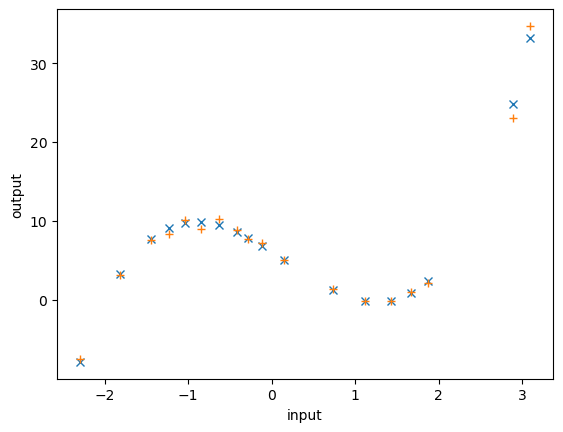

In [4]:
# Use PyTorch's autograd to automatically compute the gradients 
# Define the training function
# Note: You cannot use optimizers.
# Run it on the input and output vector with appropriate learning rate and number of iterations
# Plot the learned curve

def training_loop_2(n_epochs, learning_rate, params, out, inp):
    for epoch in range(1, 1 + n_epochs):
        prediction = model(inp, *params)
        loss = loss_fn(prediction, out)
        if params.grad is not None:
            params.grad.zero_()
        loss.backward() # gradient is computed and stored in params.grad
        with torch.no_grad():
            params -= learning_rate * params.grad # gradient descent
        if (epoch % 1000 == 0):
            print("epoch %d loss %f" %(epoch, loss)) 
    return params

params = torch.tensor([1.0, 1.0, 1.0, 1.0], requires_grad=True)
inp = torch.tensor(inp) #input
out = torch.tensor(out) #ground truth

params = training_loop_2(n_epochs = 10000,
              learning_rate = 0.001,
              params = params,
              out = out,
              inp = inp)

prediction = model(inp, *params)

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(inp.numpy(), prediction.detach().numpy(), 'x')
plt.plot(inp.numpy(), out.numpy(), '+')

C:\Users\semem\AppData\Local\Temp\ipykernel_66960\664837462.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inp = torch.tensor(inp) #input
C:\Users\semem\AppData\Local\Temp\ipykernel_66960\664837462.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = torch.tensor(out) #ground truth


epoch 1000 loss 7.206725
epoch 2000 loss 1.559047
epoch 3000 loss 0.637284
epoch 4000 loss 0.485404
epoch 5000 loss 0.460195
epoch 6000 loss 0.455988
epoch 7000 loss 0.455281
epoch 8000 loss 0.455163
epoch 9000 loss 0.455142
epoch 10000 loss 0.455140


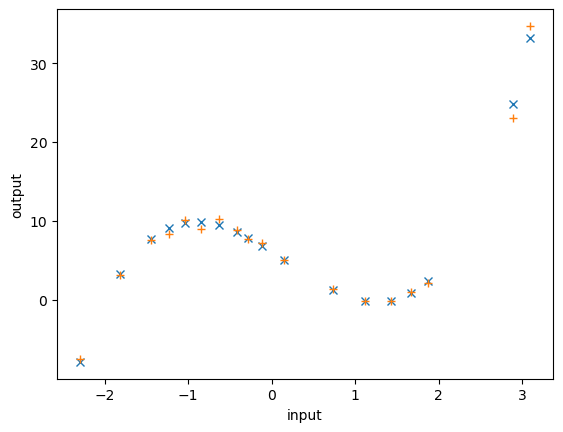

In [5]:
# Use PyTorch's autograd to automatically compute the gradients 
# Use optimizers to abstract how parameters get updated
# Define the training function
# Run it on the input and output vector with appropriate learning rate, number of iterations, and SGD optimizer
# Plot the learned curve

import torch.optim as optim

def training_loop_3(n_epochs, optimizer, params, out, inp):
    for epoch in range(1, 1 + n_epochs):
        prediction = model(inp, *params)
        loss = loss_fn(prediction, out)

        optimizer.zero_grad()
        loss.backward() # gradient is computed and stored in params.grad
        optimizer.step()
        
        
        if (epoch % 1000 == 0):
            print("epoch %d loss %f" %(epoch, loss)) 
    return params


params = torch.tensor([1.0, 1.0, 1.0, 1.0], requires_grad=True)
inp = torch.tensor(inp) #input
out = torch.tensor(out) #ground truth

params = training_loop_3(n_epochs = 10000,
              optimizer = optim.SGD([params], lr=0.001),
              params = params,
              out = out,
              inp = inp)

prediction = model(inp, *params)

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(inp.numpy(), prediction.detach().numpy(), 'x')
plt.plot(inp.numpy(), out.numpy(), '+')

epoch 1000 loss 7.175776,  20.420048
epoch 2000 loss 1.412729,  8.353414
epoch 3000 loss 0.348137,  5.819050
epoch 4000 loss 0.148024,  5.251567
epoch 5000 loss 0.109984,  5.119362
epoch 6000 loss 0.102703,  5.088820
epoch 7000 loss 0.101303,  5.082519
epoch 8000 loss 0.101033,  5.081771
epoch 9000 loss 0.100981,  5.082016
epoch 10000 loss 0.100971,  5.082311


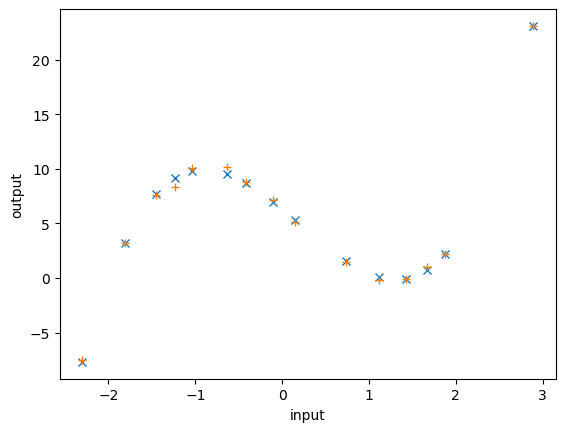

In [6]:
# Split the dataset to training set (80%) and validation set (20%) randomly
# Use PyTorch's autograd to automatically compute the gradients 
# Use optimizers to abstract how parameters get updated
# Define the training function that tracks both training and validation losses
# Run it on the input and output vector with appropriate learning rate, number of iterations, and SGD optimizer
# Plot the learned curve

n_samples = inp.size(0)
n_val = int (0.2 * n_samples)

random_indexes = torch.randperm(n_samples)
train_indexes = random_indexes[:-n_val]
val_indexes = random_indexes[-n_val:]

train_inp = inp[train_indexes]
train_out = out[train_indexes]
val_inp = inp[val_indexes]
val_out = out[val_indexes]

def training_loop_4(n_epochs, optimizer, params, train_inp, train_out, val_inp, val_out):
    for epoch in range(1, 1 + n_epochs):
        train_prediction = model(train_inp, *params)
        val_prediction = model(val_inp, *params)

        train_loss = loss_fn(train_prediction, train_out)
        val_loss = loss_fn(val_prediction, val_out)

        optimizer.zero_grad()
        train_loss.backward() # gradient is computed and stored in params.grad
        optimizer.step()
        
        
        if (epoch % 1000 == 0):
            print("epoch %d loss %f,  %f" %(epoch, train_loss, val_loss))
    return params

params = torch.tensor([1.0, 1.0, 1.0, 1.0], requires_grad=True)

params = training_loop_4(n_epochs = 10000,
              optimizer = optim.SGD([params], lr=0.001),
              params = params,
              train_inp = train_inp,
              train_out = train_out,
              val_inp = val_inp,
              val_out = val_out)

prediction = model(train_inp, *params) # training data predictions

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(train_inp.numpy(), prediction.detach().numpy(), 'x')
plt.plot(train_inp.numpy(), train_out.numpy(), '+')

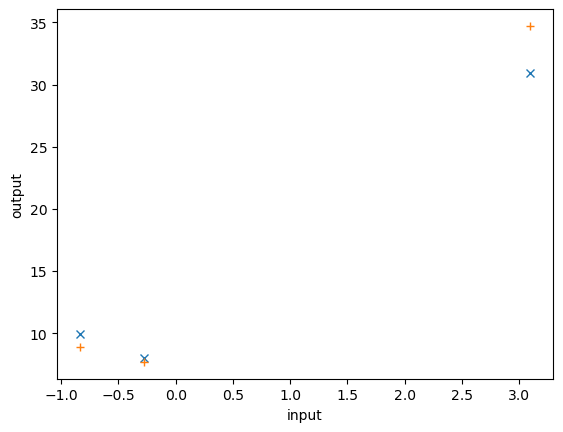

In [7]:
prediction = model(val_inp, *params) # validation data predictions

plt.figure(dpi = 100)
plt.xlabel("input")
plt.ylabel("output")
plt.plot(val_inp.numpy(), prediction.detach().numpy(), 'x')
plt.plot(val_inp.numpy(), val_out.numpy(), '+')